# Name: Mayank Mehta

# The Sparks Foundation : Data Science and Business Analytics Internship

# Task 1 : Prediction using supervised ML

In [2]:
# Installing required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [3]:
# Fetching required Data from link provided
link="http://bit.ly/w-data"
study_df=pd.read_csv(link)
study_df.head(5)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Checking column labels
study_df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
# Checking DataFrame information
study_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Checking different attributes of the data
study_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Checking for Null values in the data
study_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

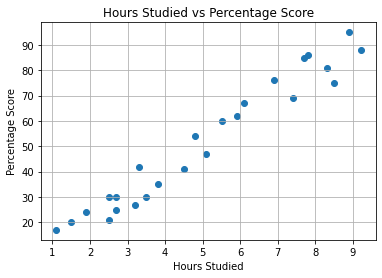

In [8]:
# Plotting the data on a scatter plot
x=study_df['Hours']
y=study_df['Scores']
plt.scatter(x,y)
plt.title('Hours Studied vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

Looking at the scatterplot, it can be inferred there is a strong positive correlation between percentage score and hours studied

#  Building linear regression model

In [9]:
from sklearn.model_selection import train_test_split  
x = study_df.iloc[:, :-1].values  
y = study_df.iloc[:, 1].values 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=45)

In [10]:
# Training the model
from sklearn.linear_model import LinearRegression  
regr = LinearRegression()  
regr.fit(x_train, y_train)

LinearRegression()

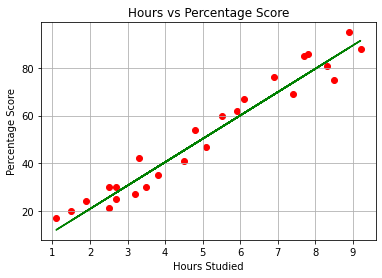

In [11]:
# Plotting Regression Line
line = regr.coef_*x+regr.intercept_
plt.scatter(x, y,color='r')
plt.plot(x, line,color='g')
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

In [12]:
# Printing Testing Data
print(x_test)

[[2.5]
 [2.7]
 [3.3]
 [7.7]
 [1.9]
 [7.8]
 [3.8]
 [7.4]]


In [13]:
# Displaying Actual Scores and Predicted Scores
y_pred = regr.predict(x_test)
df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})  
df

,Actual Score,Predicted Score
0,30,25.743575
1,30,27.705759
2,42,33.592314
3,85,76.760380
4,24,19.857020
5,86,77.741472
6,35,38.497776
7,69,73.817103


# Evaluating the performance of model

In [14]:
from sklearn import metrics
print('R2_Score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2_Score: 0.9391488478760098
Mean Absolute Error: 5.489294806376115
Mean Square Error: 35.34596219077083
Root Mean Square Error: 5.945247025210208


The evaluation parameters like R2 score which is close to 1 , MAE which is low, etc. signify that the model has performed well giving good accuracy.

In [15]:
# Predict percentage score when student studies for 10 hours.
hrs = 9.25
hours_arr=[[hrs]]
own_pred = regr.predict(hours_arr)
print("No of Hours Studied = {}".format(hrs))
print("Predicted Score of Student = {}".format(own_pred[0]))

No of Hours Studied = 9.25
Predicted Score of Student = 91.96731244938933


Thus, the predicted percentage score for a student who has studied for 9.25 hours per day is 91.97%

# Thank You! 